In [69]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [70]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [72]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [73]:
train_ds=keras.utils.image_dataset_from_directory(
     directory='/content/train',
     labels='inferred',
     label_mode='int',
     batch_size=32,
     image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
     directory='/content/test',
     labels='inferred',
     label_mode='int',
     batch_size=32,
     image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [74]:
def process(image,label):
     image=tf.cast(image/255. ,tf.float32)
     return image,label

     train_ds=train_ds.map(process)
     validation_ds=validation_ds.map(process)

In [75]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [77]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [78]:
history=model.fit(train_ds,epochs=20,validation_data=validation_ds )

Epoch 1/20
625/625 [==============================] - 54s 83ms/step - loss: 2.3203 - accuracy: 0.5803 - val_loss: 0.6423 - val_accuracy: 0.6382
Epoch 2/20
625/625 [==============================] - 50s 80ms/step - loss: 0.6235 - accuracy: 0.6583 - val_loss: 0.6383 - val_accuracy: 0.6562
Epoch 3/20
625/625 [==============================] - 51s 80ms/step - loss: 0.5320 - accuracy: 0.7279 - val_loss: 0.7172 - val_accuracy: 0.6494
Epoch 4/20
625/625 [==============================] - 53s 84ms/step - loss: 0.4336 - accuracy: 0.7981 - val_loss: 0.8695 - val_accuracy: 0.6372
Epoch 5/20
625/625 [==============================] - 50s 79ms/step - loss: 0.3551 - accuracy: 0.8439 - val_loss: 0.8851 - val_accuracy: 0.6422
Epoch 6/20
625/625 [==============================] - 51s 81ms/step - loss: 0.2809 - accuracy: 0.8870 - val_loss: 1.0606 - val_accuracy: 0.6628
Epoch 7/20
625/625 [==============================] - 51s 82ms/step - loss: 0.2001 - accuracy: 0.9240 - val_loss: 1.4362 - val_accuracy:

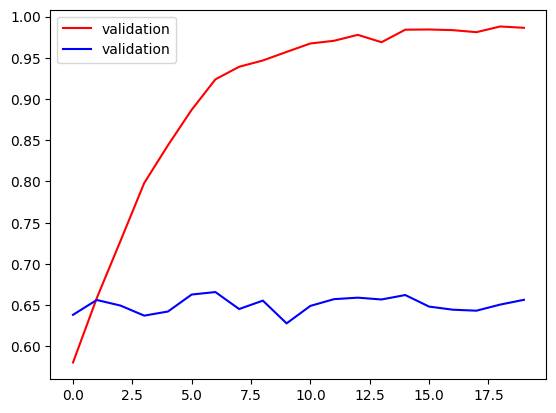

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='validation')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


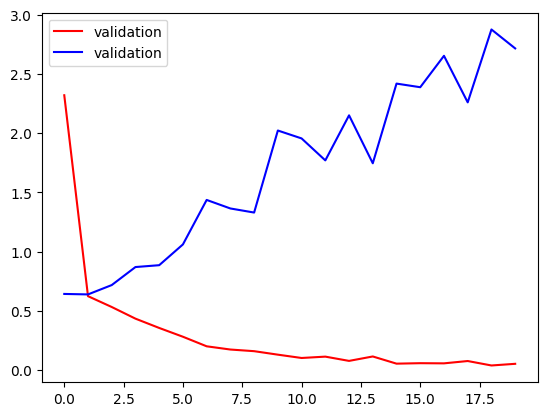

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='validation')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [81]:
import cv2

In [82]:
test_img=cv2.imread('/content/test/dogs/dog.11111.jpg')

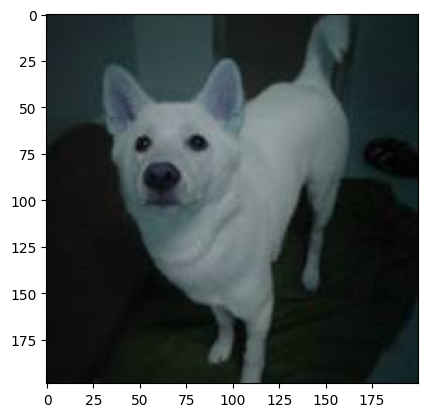

In [83]:
plt.imshow(test_img)

In [84]:
test_img.shape

(199, 200, 3)

In [85]:
test_img=cv2.resize(test_img,(256,256))

In [86]:
test_input=test_img.reshape(1,256,256,3)

In [87]:
model.predict(test_input)

1/1 [==============================] - 0s 82ms/step


array([[0.99998415]], dtype=float32)